In [1]:
from pycitylayers.client import Client
from pycitylayers.utils import PointGQL, PolygonGQL
import pandas as pd

import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point


Fetching Metadata. Please Wait ...
---------- Table:0 ----------
Name:		census_tracts 
Description:	 
Format:		CSV 

selecting 212 tracts in 5555 m radius of point -73.570552324815,45.530402345761175


,CMANAME,CMAPUID,CMATYPE,CMAUID,CTNAME,CTUID,PRNAME,PRUID,geom,index
0,Montréal,24462,B,462,0137.00,462013700,Quebec / Québec,24,"{'type': 'MultiPolygon', 'crs': {'type': 'name...",304
1,Montréal,24462,B,462,0138.00,462013800,Quebec / Québec,24,"{'type': 'MultiPolygon', 'crs': {'type': 'name...",305
2,Montréal,24462,B,462,0034.00,462003400,Quebec / Québec,24,"{'type': 'MultiPolygon', 'crs': {'type': 'name...",306
3,Montréal,24462,B,462,0035.00,462003500,Quebec / Québec,24,"{'type': 'MultiPolygon', 'crs': {'type': 'name...",307
4,Montréal,24462,B,462,0036.00,462003600,Quebec / Québec,24,"{'type': 'MultiPolygon', 'crs': {'type': 'name...",308


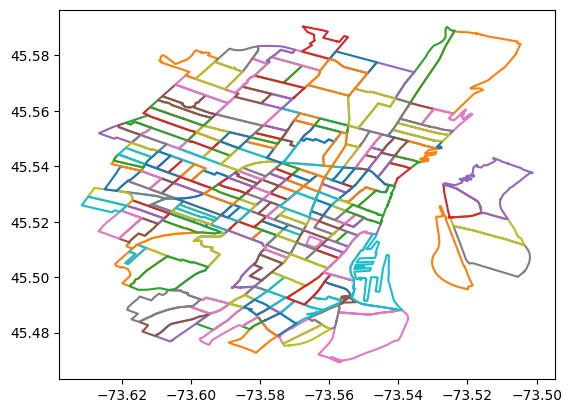

In [3]:
client = Client().create(source='cerc')
coll = client.collection
tb=coll[9][0]
print(tb)
query_point_x,query_point_y="-73.570552324815","45.530402345761175"
query_radius=0.05
query_geometry = PointGQL().point(-73.570552324815,45.530402345761175)


query_options = {
    # 'columns': ['index', 'built_area', 'geom', 'year_built'], 
    'nrows': 10000, 
    'skiprows': 0,
    'geometry_operation': 'distance_from_point',
    'geom_distance': query_radius,
    'geometry': query_geometry,
    'crs_epsg': 4326,
}

data_tracts = tb.query_simple( **query_options )
print("selecting {} tracts in {} m radius of point {},{}".format(len(data_tracts),round(query_radius*111100),query_point_x,query_point_y))
display(data_tracts.head())

for i in range(len(data_tracts)):
    vertex = data_tracts.iloc[i,:]["geom"]["coordinates"][0][0]
    polygon1=Polygon(vertex)
    plt.plot(*polygon1.exterior.xy)


In [16]:
data_tracts[data_tracts["CTNAME"]=="0147.00"]

,CMANAME,CMAPUID,CMATYPE,CMAUID,CTNAME,CTUID,PRNAME,PRUID,geom,index
43,Montréal,24462,B,462,0147.00,462014700,Quebec / Québec,24,"{'type': 'MultiPolygon', 'crs': {'type': 'name...",362


In [8]:
list(data_tracts["CTNAME"])

['0137.00',
 '0138.00',
 '0034.00',
 '0035.00',
 '0036.00',
 '0050.00',
 '0051.00',
 '0052.00',
 '0053.00',
 '0149.00',
 '0151.00',
 '0150.00',
 '0054.00',
 '0026.00',
 '0027.00',
 '0028.00',
 '0076.00',
 '0146.00',
 '0063.00',
 '0064.00',
 '0019.00',
 '0021.00',
 '0022.00',
 '0023.00',
 '0024.00',
 '0025.00',
 '0029.00',
 '0030.00',
 '0031.00',
 '0032.00',
 '0033.00',
 '0009.00',
 '0010.00',
 '0163.00',
 '0013.00',
 '0015.00',
 '0016.00',
 '0017.00',
 '0018.00',
 '0164.00',
 '0165.00',
 '0126.00',
 '0136.00',
 '0147.00',
 '0128.00',
 '0130.00',
 '0131.00',
 '0132.00',
 '0133.00',
 '0134.00',
 '0135.00',
 '0148.00',
 '0056.00',
 '0057.00',
 '0058.00',
 '0059.00',
 '0060.00',
 '0061.00',
 '0062.00',
 '0166.00',
 '0037.00',
 '0038.00',
 '0039.00',
 '0042.00',
 '0043.00',
 '0044.00',
 '0045.00',
 '0046.00',
 '0047.00',
 '0048.00',
 '0049.00',
 '0040.00',
 '0041.00',
 '0067.00',
 '0068.00',
 '0071.00',
 '0072.00',
 '0073.00',
 '0075.00',
 '0077.00',
 '0078.00',
 '0079.00',
 '0080.00',
 '01

In [10]:
census_data=pd.read_csv("Montreal Tracts.csv")

In [11]:
census_data.head()

,GEO UID,Census Tract name,Journey to Work - Total Sex / Total - Time leaving for work for the employed labour force aged 15 years and over in private households with a usual place of work or no fixed workplace address - 25% sample data / Between 5 a.m. and 5:59 a.m.,Journey to Work - Total Sex / Total - Time leaving for work for the employed labour force aged 15 years and over in private households with a usual place of work or no fixed workplace address - 25% sample data / Between 6 a.m. and 6:59 a.m.,Journey to Work - Total Sex / Total - Time leaving for work for the employed labour force aged 15 years and over in private households with a usual place of work or no fixed workplace address - 25% sample data / Between 7 a.m. and 7:59 a.m.,Journey to Work - Total Sex / Total - Time leaving for work for the employed labour force aged 15 years and over in private households with a usual place of work or no fixed workplace address - 25% sample data / Between 8 a.m. and 8:59 a.m.,Journey to Work - Total Sex / Total - Time leaving for work for the employed labour force aged 15 years and over in private households with a usual place of work or no fixed workplace address - 25% sample data / Between 9 a.m. and 11:59 a.m.,Journey to Work - Total Sex / Total - Time leaving for work for the employed labour force aged 15 years and over in private households with a usual place of work or no fixed workplace address - 25% sample data / Between 12 p.m. and 4:59 a.m.,Journey to Work - Total Sex / Total - Commuting duration for the employed labour force aged 15 years and over in private households with a usual place of work or no fixed workplace address - 25% sample data / Less than 15 minutes,Journey to Work - Total Sex / Total - Commuting duration for the employed labour force aged 15 years and over in private households with a usual place of work or no fixed workplace address - 25% sample data / 15 to 29 minutes,...,Age & Sex - Females / Total - Age groups and average age of the population - 100% data ; Females / 15 to 64 years ; Females,Age & Sex - Females / Total - Age groups and average age of the population - 100% data ; Females / 65 years and over ; Females,Age & Sex - Females / Average age of the population ; Females,Age & Sex - Females / Total - Distribution (%) of the population by broad age groups - 100% data ; Females / 0 to 14 years ; Females,Age & Sex - Females / Total - Distribution (%) of the population by broad age groups - 100% data ; Females / 15 to 64 years ; Females,Age & Sex - Females / Total - Distribution (%) of the population by broad age groups - 100% data ; Females / 65 years and over ; Females,"Population and dwelling counts / Population, 2016",Population and dwelling counts / Total private dwellings,Population and dwelling counts / Private dwellings occupied by usual residents,Population and dwelling counts / Population density per square kilometre
0,4620000.0,0.0,144135.0,329230.0,528075.0,383810.0,217905.0,280660.0,341880.0,601245.0,...,1379570.0,380345.0,41.6,16.1,65.8,18.1,4098927.0,1823281.0,1727310.0,890.2
1,4620001.0,1.0,120.0,280.0,435.0,190.0,120.0,220.0,220.0,415.0,...,945.0,220.0,43.4,10.4,72.7,16.9,2638.0,1452.0,1328.0,5710.0
2,4620002.0,2.0,170.0,280.0,460.0,230.0,95.0,415.0,255.0,525.0,...,1200.0,345.0,42.2,16.0,65.2,18.8,3516.0,1902.0,1762.0,9029.3
3,4620003.0,3.0,220.0,605.0,760.0,460.0,235.0,535.0,385.0,885.0,...,2210.0,590.0,43.0,14.8,67.4,18.0,6373.0,3103.0,2937.0,8612.2
4,4620004.0,4.0,150.0,310.0,440.0,255.0,120.0,310.0,270.0,455.0,...,1115.0,335.0,45.1,11.3,68.4,20.6,3176.0,1704.0,1603.0,7087.7


In [17]:
tract147=census_data[census_data["Census Tract name"]==0147.00]

In [18]:
tract147

,GEO UID,Census Tract name,Journey to Work - Total Sex / Total - Time leaving for work for the employed labour force aged 15 years and over in private households with a usual place of work or no fixed workplace address - 25% sample data / Between 5 a.m. and 5:59 a.m.,Journey to Work - Total Sex / Total - Time leaving for work for the employed labour force aged 15 years and over in private households with a usual place of work or no fixed workplace address - 25% sample data / Between 6 a.m. and 6:59 a.m.,Journey to Work - Total Sex / Total - Time leaving for work for the employed labour force aged 15 years and over in private households with a usual place of work or no fixed workplace address - 25% sample data / Between 7 a.m. and 7:59 a.m.,Journey to Work - Total Sex / Total - Time leaving for work for the employed labour force aged 15 years and over in private households with a usual place of work or no fixed workplace address - 25% sample data / Between 8 a.m. and 8:59 a.m.,Journey to Work - Total Sex / Total - Time leaving for work for the employed labour force aged 15 years and over in private households with a usual place of work or no fixed workplace address - 25% sample data / Between 9 a.m. and 11:59 a.m.,Journey to Work - Total Sex / Total - Time leaving for work for the employed labour force aged 15 years and over in private households with a usual place of work or no fixed workplace address - 25% sample data / Between 12 p.m. and 4:59 a.m.,Journey to Work - Total Sex / Total - Commuting duration for the employed labour force aged 15 years and over in private households with a usual place of work or no fixed workplace address - 25% sample data / Less than 15 minutes,Journey to Work - Total Sex / Total - Commuting duration for the employed labour force aged 15 years and over in private households with a usual place of work or no fixed workplace address - 25% sample data / 15 to 29 minutes,...,Age & Sex - Females / Total - Age groups and average age of the population - 100% data ; Females / 15 to 64 years ; Females,Age & Sex - Females / Total - Age groups and average age of the population - 100% data ; Females / 65 years and over ; Females,Age & Sex - Females / Average age of the population ; Females,Age & Sex - Females / Total - Distribution (%) of the population by broad age groups - 100% data ; Females / 0 to 14 years ; Females,Age & Sex - Females / Total - Distribution (%) of the population by broad age groups - 100% data ; Females / 15 to 64 years ; Females,Age & Sex - Females / Total - Distribution (%) of the population by broad age groups - 100% data ; Females / 65 years and over ; Females,"Population and dwelling counts / Population, 2016",Population and dwelling counts / Total private dwellings,Population and dwelling counts / Private dwellings occupied by usual residents,Population and dwelling counts / Population density per square kilometre
162,4620147.0,147.0,15.0,120.0,435.0,475.0,250.0,185.0,180.0,550.0,...,1050.0,115.0,37.1,12.4,78.7,8.6,2749.0,1670.0,1519.0,16353.4


In [11]:
list(census_data.columns)

['GEO UID',
 'Census Tract name',
 'Journey to Work - Total Sex / Total - Time leaving for work for the employed labour force aged 15 years and over in private households with a usual place of work or no fixed workplace address - 25% sample data / Between 5 a.m. and 5:59 a.m.',
 'Journey to Work - Total Sex / Total - Time leaving for work for the employed labour force aged 15 years and over in private households with a usual place of work or no fixed workplace address - 25% sample data / Between 6 a.m. and 6:59 a.m.',
 'Journey to Work - Total Sex / Total - Time leaving for work for the employed labour force aged 15 years and over in private households with a usual place of work or no fixed workplace address - 25% sample data / Between 7 a.m. and 7:59 a.m.',
 'Journey to Work - Total Sex / Total - Time leaving for work for the employed labour force aged 15 years and over in private households with a usual place of work or no fixed workplace address - 25% sample data / Between 8 a.m. an

In [16]:
census_data.columns

Index(['GEO UID', 'CMA code', 'Census Tract name',
       'Journey to Work - Total Sex / Total - Commuting destination for the employed labour force aged 15 years and over in private households with',
       'Journey to Work - Total Sex / Total - Main mode of commuting for the employed labour force aged 15 years and over in private households wit',
       'Journey to Work - Total Sex / Total - Commuting duration for the employed labour force aged 15 years and over in private households with a',
       'Journey to Work - Total Sex / Total - Time leaving for work for the employed labour force aged 15 years and over in private households with',
       'Labour - Total Sex / Total - Population aged 15 years and over by Labour force status - 25% sample data',
       'Education - Total Sex / Total - Highest certificate, diploma or degree for the population aged 15 years and over in private households - 25',
       'Education - Total Sex / Total - Highest certificate, diploma or degree for the

In [10]:
census_data=pd.read_excel("Montreal Tracts.xlsx")
census_data.head()

,GEO UID,Census Tract name,Journey to Work - Total Sex / Total - Time leaving for work for the employed labour force aged 15 years and over in private households with a usual place of work or no fixed workplace address - 25% sample data / Between 5 a.m. and 5:59 a.m.,Journey to Work - Total Sex / Total - Time leaving for work for the employed labour force aged 15 years and over in private households with a usual place of work or no fixed workplace address - 25% sample data / Between 6 a.m. and 6:59 a.m.,Journey to Work - Total Sex / Total - Time leaving for work for the employed labour force aged 15 years and over in private households with a usual place of work or no fixed workplace address - 25% sample data / Between 7 a.m. and 7:59 a.m.,Journey to Work - Total Sex / Total - Time leaving for work for the employed labour force aged 15 years and over in private households with a usual place of work or no fixed workplace address - 25% sample data / Between 8 a.m. and 8:59 a.m.,Journey to Work - Total Sex / Total - Time leaving for work for the employed labour force aged 15 years and over in private households with a usual place of work or no fixed workplace address - 25% sample data / Between 9 a.m. and 11:59 a.m.,Journey to Work - Total Sex / Total - Time leaving for work for the employed labour force aged 15 years and over in private households with a usual place of work or no fixed workplace address - 25% sample data / Between 12 p.m. and 4:59 a.m.,Journey to Work - Total Sex / Total - Commuting duration for the employed labour force aged 15 years and over in private households with a usual place of work or no fixed workplace address - 25% sample data / Less than 15 minutes,Journey to Work - Total Sex / Total - Commuting duration for the employed labour force aged 15 years and over in private households with a usual place of work or no fixed workplace address - 25% sample data / 15 to 29 minutes,...,Age & Sex - Females / Total - Age groups and average age of the population - 100% data ; Females / 15 to 64 years ; Females,Age & Sex - Females / Total - Age groups and average age of the population - 100% data ; Females / 65 years and over ; Females,Age & Sex - Females / Average age of the population ; Females,Age & Sex - Females / Total - Distribution (%) of the population by broad age groups - 100% data ; Females / 0 to 14 years ; Females,Age & Sex - Females / Total - Distribution (%) of the population by broad age groups - 100% data ; Females / 15 to 64 years ; Females,Age & Sex - Females / Total - Distribution (%) of the population by broad age groups - 100% data ; Females / 65 years and over ; Females,"Population and dwelling counts / Population, 2016",Population and dwelling counts / Total private dwellings,Population and dwelling counts / Private dwellings occupied by usual residents,Population and dwelling counts / Population density per square kilometre
0,COL0,COL1,COL2,COL3,COL4,COL5,COL6,COL7,COL8,COL9,...,COL145,COL146,COL147,COL148,COL149,COL150,COL151,COL152,COL153,COL154
1,4620000,0,144135,329230,528075,383810,217905,280660,341880,601245,...,1379570,380345,41.6,16.1,65.8,18.1,4098927,1823281,1727310,890.2
2,4620001,1,120,280,435,190,120,220,220,415,...,945,220,43.4,10.4,72.7,16.9,2638,1452,1328,5710
3,4620002,2,170,280,460,230,95,415,255,525,...,1200,345,42.2,16,65.2,18.8,3516,1902,1762,9029.3
4,4620003,3,220,605,760,460,235,535,385,885,...,2210,590,43,14.8,67.4,18,6373,3103,2937,8612.2


In [7]:
display(list(census_data.columns))

['GEO UID',
 'Census Tract name',
 'Journey to Work - Total Sex / Total - Time leaving for work for the employed labour force aged 15 years and over in private households with a usual place of work or no fixed workplace address - 25% sample data / Between 5 a.m. and 5:59 a.m.',
 'Journey to Work - Total Sex / Total - Time leaving for work for the employed labour force aged 15 years and over in private households with a usual place of work or no fixed workplace address - 25% sample data / Between 6 a.m. and 6:59 a.m.',
 'Journey to Work - Total Sex / Total - Time leaving for work for the employed labour force aged 15 years and over in private households with a usual place of work or no fixed workplace address - 25% sample data / Between 7 a.m. and 7:59 a.m.',
 'Journey to Work - Total Sex / Total - Time leaving for work for the employed labour force aged 15 years and over in private households with a usual place of work or no fixed workplace address - 25% sample data / Between 8 a.m. an

In [13]:
our_tract=census_data[census_data["Census Tract name"]==147]

In [15]:
import plotly.express as px


In [16]:
our_tract['Dwelling characteristics / Total - Private households by household size - 100% data / 1 person']


163    760
Name: Dwelling characteristics / Total - Private households by household size - 100% data / 1 person, dtype: object

In [18]:
our_tract['Population and dwelling counts / Population, 2016']

163    2749
Name: Population and dwelling counts / Population, 2016, dtype: object

In [19]:
our_tract['Population and dwelling counts / Total private dwellings']

163    1670
Name: Population and dwelling counts / Total private dwellings, dtype: object